In [2]:
import random
from math import inf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# CSP class
class CSP:
    def __init__(self , board , n):
        self.board = board
        self.n = n

    def Copy(self): 
        return CSP([[int(i) for i in row] for row in self.board] , self.n)   
    
    # Print table
    def PrintTable(self):
        table = np.array(self.board)
        _ , im = plt.subplots()
        im.matshow(table, cmap='binary')

        for i in range(len(table)):
            for j in range(len(table[i])):
                if (i + j) % 2 == 0:
                    SquareColor = 'white'
                else:
                    SquareColor = 'black'
                im.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=SquareColor))
                if table[i, j] == 1:
                    plt.text(j, i, '♕', ha='center', va='center', color='r', fontsize=20)

        plt.show()   
    # Find the sum of the threats 
    #(including two ministers in a row,
    # in the same diagonal (left or diagonal))

    def menace(self, row, col):
        flag = 0 # counter

        # Ministers should not be in the same row
        for i in range(self.n):
            if i != col and self.board[row][i] == 1:
                flag += 1
        # Check the diameter (toward the top left)    
        r, c = row, col
        while r >= 0 and c >= 0:
            if r != row and c != col and self.board[r][c] == 1:
                flag += 1
            r -= 1
            c -= 1
        # Check the diameter (toward the bottom right)
        r, c = row, col
        while r < self.n and c < self.n:
            if r != row and c != col and self.board[r][c] == 1:
                flag += 1
            r += 1
            c += 1
        # Check the diameter (toward the bottom left)
        r, c = row, col
        while r < self.n and c >= 0:
            if r != row and c != col and self.board[r][c] == 1:
                flag += 1
            r += 1
            c -= 1
        # Check the diameter (toward the top right)
        r, c = row, col
        while r >= 0 and c < self.n:
            if r != row and c != col and self.board[r][c] == 1:
                flag += 1
            r -= 1
            c += 1
        # return the sum of threats
        return flag
    # Is the chess table safe or not?
    def Is_Goal(self):
        for i in range(self.n):
            for j in range(self.n):
                if self.board[i][j] == 1 and self.menace(i, j) != 0:
                    return False
        return True
    def VARIABLES(self):
        list_index = []

        for i in range(self.n):
            for j in range(self.n):
                if self.board[j][i] == 1:
                    break
            conflict = self.menace(j, i)
            if conflict:
                list_index.append(i)
        return list_index 

In [4]:
# It is explained in detail in the PDF
def Minimize(csp, x, y):
    Min = inf
    Answer = []
    for i in range(csp.n):
        if i != x:
            CSP_Copy = csp.Copy()
            CSP_Copy.board[x][y] = 0
            CSP_Copy.board[i][y] = 1
            val = CSP_Copy.menace(i, y)
            if Min > val:
                Min = val
                Answer = CSP_Copy
    return Answer    

In [5]:
def MinimumConflicts(csp, MAX_STEP):
    current = csp.Copy()

    for i in range(MAX_STEP):
        if current.Is_Goal(): # If the table is safe, return the solution
            return current
        var = current.VARIABLES()[random.randint(0, len(current.VARIABLES()) - 1)] # Column selection

        # Finding the ministerial row we found above
        for k in range(current.n):
            if current.board[k][var] == 1:
                break 

        #  Find the best row for the minister
        #  and put the this in current 
        #  and continue working  
  
        minimize = Minimize(current, k, var)
        current = minimize

    return False # If we exceed the limit

In [6]:

def test(n):
    table = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        table[random.randint(0, n - 1)][i] = 1

    sample = CSP(table , n)

    answer = MinimumConflicts(sample , 1000)
    if not answer:
        print("Solution does not exist")
    else:
        print("Solution found!")
        answer.PrintTable()

Solution found!


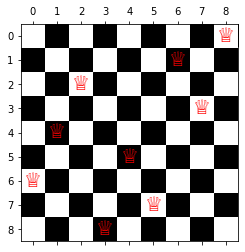

In [9]:
test(9)

Solution found!


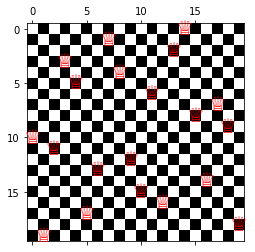

In [10]:
test(20)

Solution found!


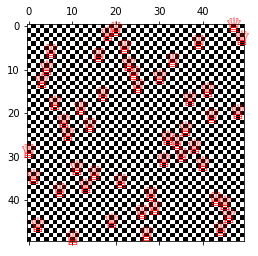

In [67]:
test(50)

Solution found!


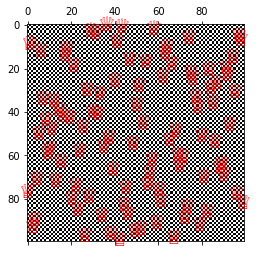

In [72]:
test(100)

Solution found!


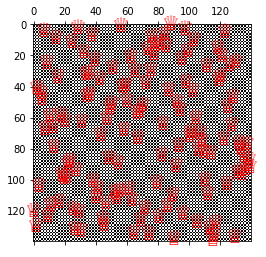

In [71]:
test(140)